In [1]:
# Langkah 1: Impor library yang diperlukan
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Langkah 2: Muat dataset
data = pd.read_csv('Loan_default.csv', sep=';')
# Menampilkan 5 baris pertama dari dataset
print("Dataset:")
print(data.head())

Dataset:
       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full

In [3]:
# Langkah 3. Preprocessing
# a. Data Cleaning
# Cek apakah ada missing value
missing_values = data.isnull().sum()
print("Jumlah Missing Value per Kolom:")
print(missing_values)

Jumlah Missing Value per Kolom:
LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


In [4]:
# langkah 4 Mengubah data kategori menjadi numerik menggunakan ordered target statistik
for column in ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']:
    # Menghitung mean dari target variable 'Default' untuk setiap nilai unik di kolom yang sedang di-loop
    target_mean = data.groupby(column)['Default'].mean().reset_index()
    # Mengganti nama kolom 'Default' menjadi '<column>_Target_Mean'
    target_mean.rename(columns={'Default': f'{column}_Target_Mean'}, inplace=True)
      # Menggabungkan data asli dengan data mean encoding berdasarkan kolom yang sedang di-loop
    data = data.merge(target_mean, on=column, how='left')
    # Mengganti nilai kolom asli dengan nilai mean encoding yang baru ditambahkan
    data[column] = data[f'{column}_Target_Mean']
    # Menghapus kolom sementara yang berisi nilai mean encoding
    data.drop(columns=[f'{column}_Target_Mean'], inplace=True)

# Pisahkan fitur dan variabel target setelah transformasi
X = data.drop(columns=['LoanID', 'Default'])
y = data['Default']

# Menampilkan beberapa baris pertama dan beberapa baris terakhir dari data setelah transformasi
print("Data Setelah Transformasi Fitur Kategori menjadi Numerik dengan Ordered Target Statistic:")
print(X.head())

Data Setelah Transformasi Fitur Kategori menjadi Numerik dengan Ordered Target Statistic:
   Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   
2   46   84208      129188          451              26               3   
3   32   31713       44799          743               0               3   
4   60   20437        9139          633               8               4   

   InterestRate  LoanTerm  DTIRatio  Education  EmploymentType  MaritalStatus  \
0         15.23        36      0.44   0.121011        0.094634       0.125328   
1          4.81        60      0.68   0.108717        0.094634       0.103972   
2         21.17        24      0.31   0.108717        0.135529       0.125328   
3          7.07        24      0.23   0.128789        0.094634       0.103972   
4          6.51        48      0.73   0.121011        

In [5]:
# Langkah 6: Normalisasi data menggunakan MinMaxScaler
scaler_minmax = MinMaxScaler()
X_normalized = scaler_minmax.fit_transform(X)

# Menampilkan beberapa baris pertama dari data setelah normalisasi menggunakan MinMaxScaler
print("Data Setelah Normalisasi dengan MinMaxScaler:")
print(X_normalized[:5])

# # Impor modul StandardScaler
# from sklearn.preprocessing import StandardScaler
# # Langkah 6: Normalisasi data menggunakan StandardScaler (Z-score)
# scaler_zscore = StandardScaler()
# X_normalized_zscore = scaler_zscore.fit_transform(X)

# # Menampilkan beberapa baris pertama dari data setelah normalisasi menggunakan StandardScaler
# print("Data Setelah Normalisasi dengan StandardScaler (Z-score):")
# print(X_normalized_zscore[:5])


Data Setelah Normalisasi dengan MinMaxScaler:
[[0.74509804 0.52588538 0.18607015 0.4007286  0.67226891 1.
  0.57521739 0.5        0.425      0.66079078 0.         1.
  0.         0.         0.74297224 0.        ]
 [1.         0.2624612  0.48751219 0.28779599 0.12605042 0.
  0.12217391 1.         0.725      0.12462744 0.         0.
  1.         1.         0.74297224 0.        ]
 [0.54901961 0.51265565 0.50689186 0.27504554 0.21848739 0.66666667
  0.83347826 0.25       0.2625     0.12462744 1.         1.
  0.         0.         0.78741215 1.        ]
 [0.2745098  0.12380092 0.16244556 0.80692168 0.         0.66666667
  0.22043478 0.25       0.1625     1.         0.         0.
  1.         1.         1.         1.        ]
 [0.82352941 0.04027437 0.01689395 0.60655738 0.06722689 1.
  0.19608696 0.75       0.7875     0.66079078 1.         1.
  1.         0.         0.78741215 1.        ]]


In [6]:
from sklearn.model_selection import train_test_split
# Langkah 7: Split dataset menjadi data latih dan data uji (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

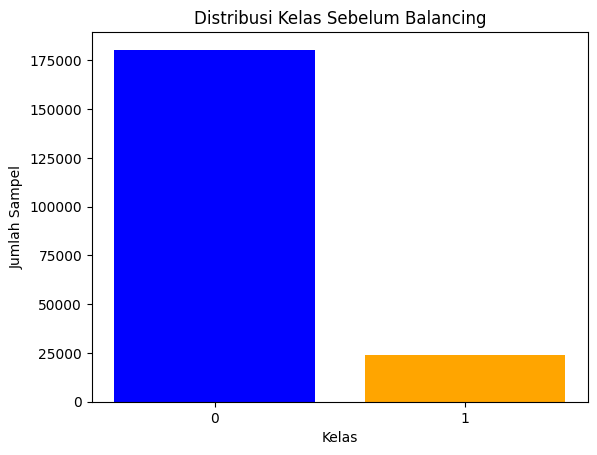

In [7]:
# Import library yang diperlukan
import matplotlib.pyplot as plt

# Hitung jumlah sampel untuk setiap kelas sebelum balancing
counts_original = y_train.value_counts()

# Plot histogram distribusi kelas sebelum balancing
plt.bar(counts_original.index, counts_original.values, color=['blue', 'orange'])
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.title('Distribusi Kelas Sebelum Balancing')
plt.xticks(counts_original.index, labels=[0, 1])
plt.show()


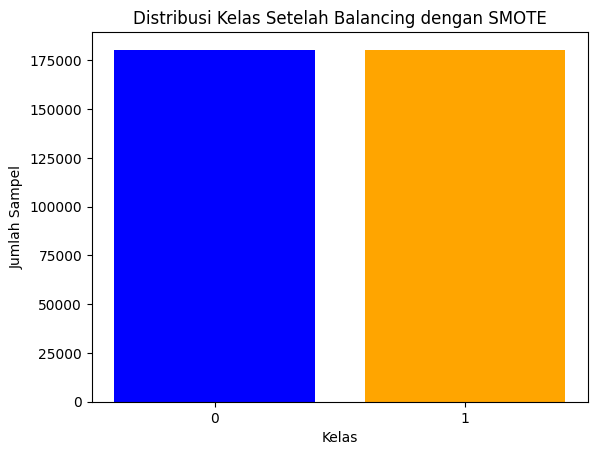

In [8]:
#Langkah 8 Balancing data setelah di split
from imblearn.over_sampling import SMOTE

# Langkah 3: Balancing data menggunakan SMOTE hanya pada data latih (80%)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Hitung jumlah sampel untuk setiap kelas setelah balancing
counts_resampled = y_train_resampled.value_counts()

# Plot distribusi kelas setelah balancing
plt.bar(counts_resampled.index, counts_resampled.values, color=['blue', 'orange'])
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.title('Distribusi Kelas Setelah Balancing dengan SMOTE')
plt.xticks(counts_resampled.index, labels=[0, 1])
plt.show()

0:	learn: 0.6299238	total: 235ms	remaining: 3m 54s
100:	learn: 0.2031014	total: 6.24s	remaining: 55.5s
200:	learn: 0.1899471	total: 12s	remaining: 47.9s
300:	learn: 0.1856013	total: 17.9s	remaining: 41.5s
400:	learn: 0.1822168	total: 23.4s	remaining: 35s
500:	learn: 0.1796402	total: 28.9s	remaining: 28.8s
600:	learn: 0.1773270	total: 34.5s	remaining: 22.9s
700:	learn: 0.1748409	total: 40.2s	remaining: 17.1s
800:	learn: 0.1730993	total: 45.8s	remaining: 11.4s
900:	learn: 0.1713030	total: 51.6s	remaining: 5.67s
999:	learn: 0.1695366	total: 57.1s	remaining: 0us


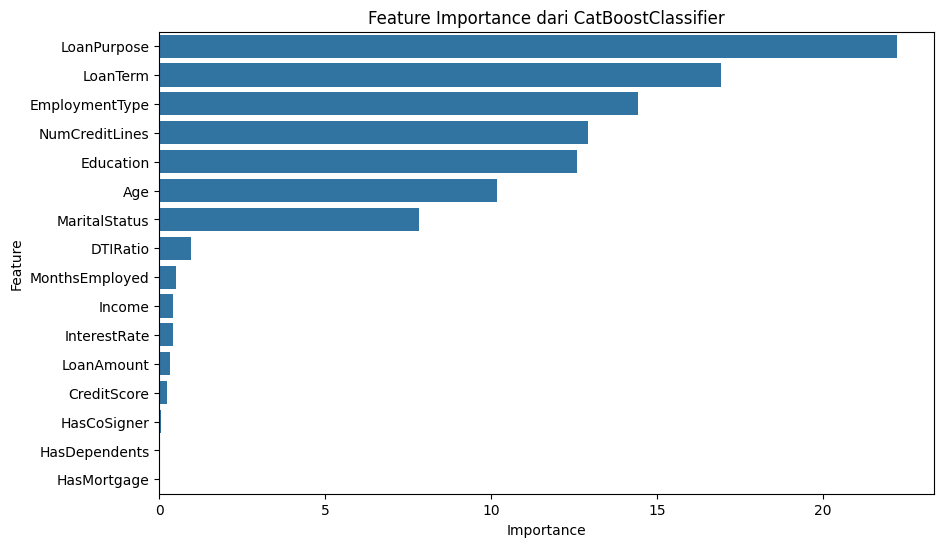

In [9]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
import time

# Inisialisasi model CatBoostClassifier
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='Logloss', random_seed=42)
model.fit(X_train_resampled, y_train_resampled, verbose=100)


# Feature importance
feature_importances = model.get_feature_importance()
feature_names = data.drop(columns=['LoanID', 'Default']).columns

# Plot feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance dari CatBoostClassifier')
plt.show()


In [10]:
# Pilih fitur dengan importance di atas threshold tertentu 
threshold = 1.0
important_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].tolist()

# Gunakan fitur penting untuk model
X_train_important = pd.DataFrame(X_train_resampled, columns=feature_names)[important_features]
X_test_important = pd.DataFrame(X_test, columns=feature_names)[important_features]
print("Fitur yang dipakai berdasarkan importance di atas threshold:")
print(important_features)

Fitur yang dipakai berdasarkan importance di atas threshold:
['LoanPurpose', 'LoanTerm', 'EmploymentType', 'NumCreditLines', 'Education', 'Age', 'MaritalStatus']


In [17]:
# Inisialisasi KFold dengan nilai split 3,5,7,10
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Gunakan KFold untuk pembagian data
for train_index, val_index in kf.split(X_train_important, y_train_resampled):
    X_train_fold, X_val_fold = X_train_important.iloc[train_index], X_train_important.iloc[val_index]
    y_train_fold, y_val_fold = y_train_resampled.iloc[train_index], y_train_resampled.iloc[val_index]

    # Inisialisasi dan pelatihan model CatBoostClassifier
    start_time = time.time()
    model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='Logloss', random_seed=42)
    model.fit(X_train_fold, y_train_fold, eval_set=(X_val_fold, y_val_fold), early_stopping_rounds=50, verbose=100)
    training_time = time.time() - start_time
    print("Training time:", training_time)

    # Prediksi menggunakan model yang telah dilatih
    y_pred = model.predict(X_val_fold)

    # Hitung confusion matrix
    conf_matrix = confusion_matrix(y_val_fold, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_val_fold, y_pred)
    precision = precision_score(y_val_fold, y_pred)
    recall = recall_score(y_val_fold, y_pred)
    f1 = f1_score(y_val_fold, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

0:	learn: 0.6287703	test: 0.6288729	best: 0.6288729 (0)	total: 34.2ms	remaining: 34.2s
100:	learn: 0.2163866	test: 0.2177238	best: 0.2177238 (100)	total: 3.19s	remaining: 28.4s
200:	learn: 0.2054796	test: 0.2075125	best: 0.2075073 (199)	total: 5.99s	remaining: 23.8s
300:	learn: 0.1998219	test: 0.2030882	best: 0.2030882 (300)	total: 8.75s	remaining: 20.3s
400:	learn: 0.1969159	test: 0.2013361	best: 0.2013361 (400)	total: 11.4s	remaining: 17.1s
500:	learn: 0.1951241	test: 0.2007348	best: 0.2007348 (500)	total: 14.2s	remaining: 14.2s
600:	learn: 0.1936050	test: 0.2002240	best: 0.2002240 (600)	total: 16.9s	remaining: 11.3s
700:	learn: 0.1922908	test: 0.2000736	best: 0.2000736 (700)	total: 19.7s	remaining: 8.39s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.1999948751
bestIteration = 738

Shrink model to first 739 iterations.
Training time: 22.777376413345337
Confusion Matrix:
[[60231    10]
 [ 7998 52111]]
Accuracy: 0.9334607395097632
Precision: 0.999808138754053
Reca

In [19]:
# Prediksi menggunakan model yang telah dilatih pada data uji 20%
y_pred_test = model.predict(X_test_important)

# Hitung metrik evaluasi pada data uji
accuracy_test = accuracy_score(y_test, y_pred_test)

# Tampilkan metrik evaluasi pada data uji
print("Evaluation Metrics on Test Data:")
print("Accuracy:", accuracy_test)

# Tampilkan confusion matrix pada data uji
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix on Test Data:")
print(conf_matrix_test)

# Tampilkan classification report pada data uji
class_report_test = classification_report(y_test, y_pred_test)
print("\nClassification Report:\n", class_report_test)

Evaluation Metrics on Test Data:
Accuracy: 0.8844135500293715
Confusion Matrix on Test Data:
[[45167     3]
 [ 5900     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     45170
           1       0.00      0.00      0.00      5900

    accuracy                           0.88     51070
   macro avg       0.44      0.50      0.47     51070
weighted avg       0.78      0.88      0.83     51070

